# Exploratory Data Analysis - Terrorism

#  ● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

# ● As a security/defense analyst, try to find out the hot zone of terrorism.

# ● What all security issues and insights you can derive by EDA?

In [1]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
dataset = pd.read_csv("datasets/global_terrorism.csv",encoding ='ISO-8859-1')

In [3]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# renaming the columns
dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
dataset.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# extracting only required features
dataset=dataset[['Year','Month','Extended','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
dataset.head()

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
#checking for the null values
dataset.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
# so the null values are present in :
# 1) state
# 2) city
# 3)latitude
# 4)longitude
# 5)killed
# 6)wounded
# 7)target
# 8)summary
# 9)motive

In [10]:
# now let's check for the datatype of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181055 non-null  object 
 14  Summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  Motive       50561 non-n

In [11]:
# let's see the mean , median value of the data present in each column
dataset.describe(include = 'all')

,Year,Month,Extended,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,0.045346,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,0.208063,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,0.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,0.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dataset.columns

Index(['Year', 'Month', 'Extended', 'Day', 'Country', 'state', 'Region',
       'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
       'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [13]:
# getting some important analysis

# idxmax() function returns index of first occurrence of maximum over requested axis.
# While finding the index of the maximum value across any index, all NA/null values are excluded.

print("Country with most number of attacks : ",dataset['Country'].value_counts().idxmax())
print("City with most number of attacks :",dataset['city'].value_counts().index[1])
print("Region with most number of attacks :",dataset['Region'].value_counts().idxmax())
print("Year with most number of attacks :",dataset['Year'].value_counts().idxmax())
print("Most attack types are : ",dataset["AttackType"].value_counts().idxmax())


Country with most number of attacks :  Iraq
City with most number of attacks : Baghdad
Region with most number of attacks : Middle East & North Africa
Year with most number of attacks : 2014
Most attack types are :  Bombing/Explosion


# Data Visualization

# Plotting The Number Of Terrorist Activities Happening Each Year

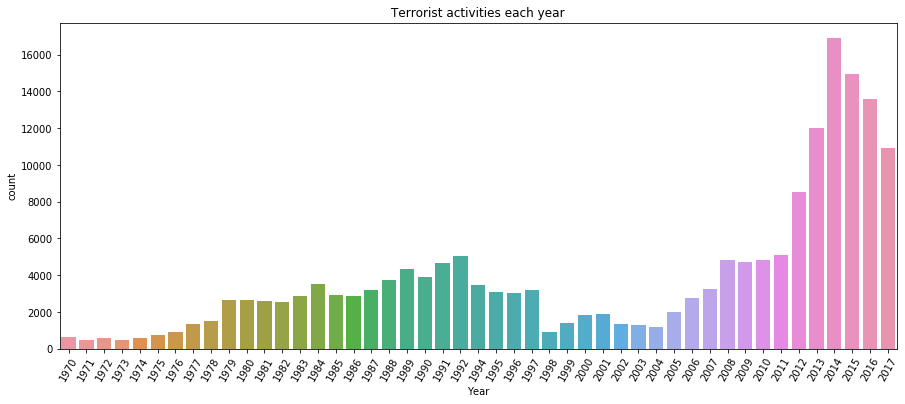

In [14]:
plt.subplots(figsize = (15,6))
sns.countplot(dataset['Year'])
plt.title("Terrorist activities each year")
plt.xticks(rotation=60)
plt.show()

# Plotting The Attack Type

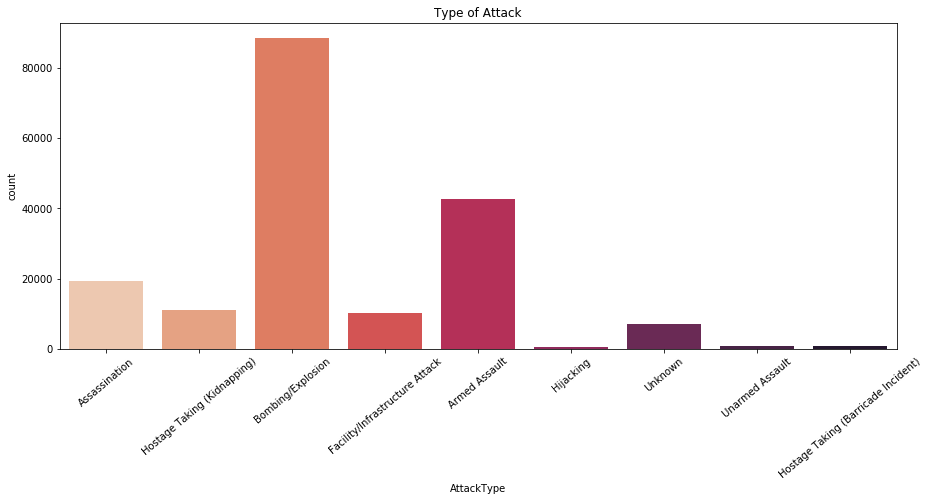

In [15]:
plt.subplots(figsize = (15,6))
sns.countplot(dataset['AttackType'],palette='rocket_r')
plt.title("Type of Attack")
plt.xticks(rotation=40)
plt.show()

# Plotting Month and Year with Commom Attack Type

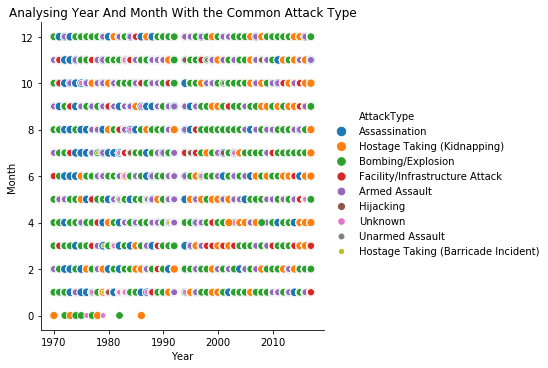

In [16]:

sns.relplot(x='Year',y='Month',data =dataset,hue='AttackType',size='AttackType')
plt.title("Analysing Year And Month With the Common Attack Type")
plt.xticks(rotation=0)
plt.show()

# Countries Affected By The Terror Activities

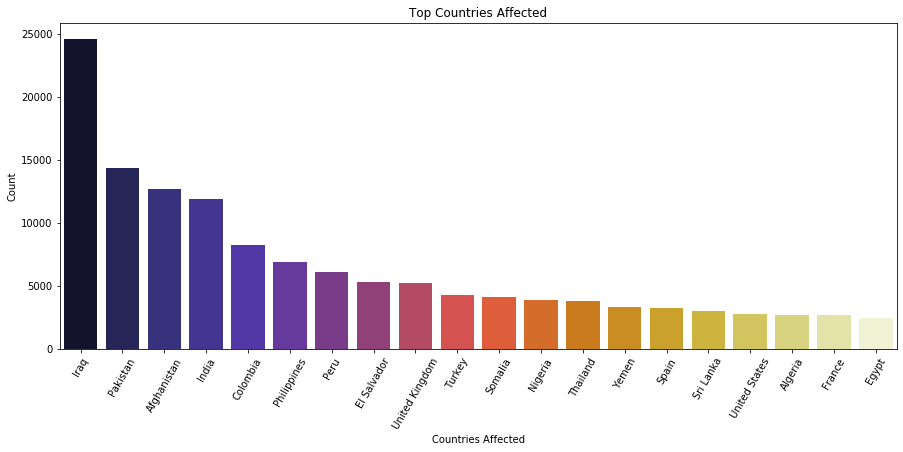

In [17]:
plt.subplots(figsize=(15,6))
sns.barplot(dataset['Country'].value_counts()[:20].index,dataset['Country'].value_counts()[:20].values,palette="CMRmap")
plt.title("Top Countries Affected")
plt.xticks(rotation=60)
plt.xlabel("Countries Affected")
plt.ylabel("Count")
plt.show()

In [18]:
dataset['Killed'].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
184.0        1
163.0        1
135.0        1
128.0        1
280.0        1
Name: Killed, Length: 205, dtype: int64

# Plotting Number of People Killed Every Year

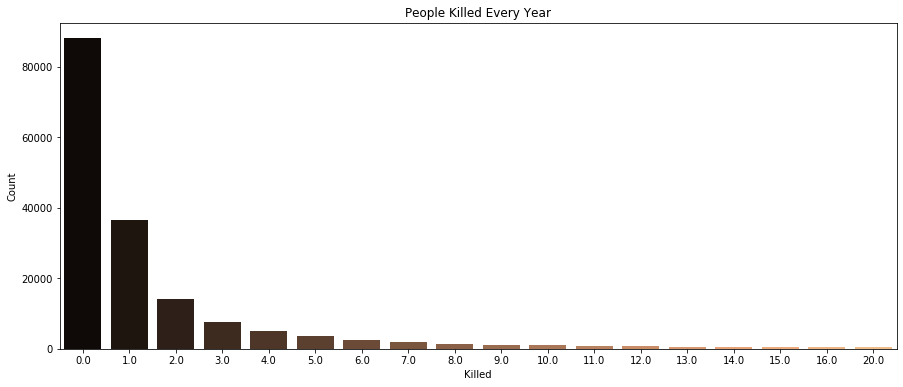

In [19]:
plt.subplots(figsize=(15,6))
sns.barplot(dataset['Killed'].value_counts()[:20].index,dataset['Killed'].value_counts()[:20].values,palette='copper')
plt.title("People Killed Every Year")
plt.xlabel("Killed")
plt.ylabel("Count")
plt.show()

# Plotting the Number Of Injuries in Each Year

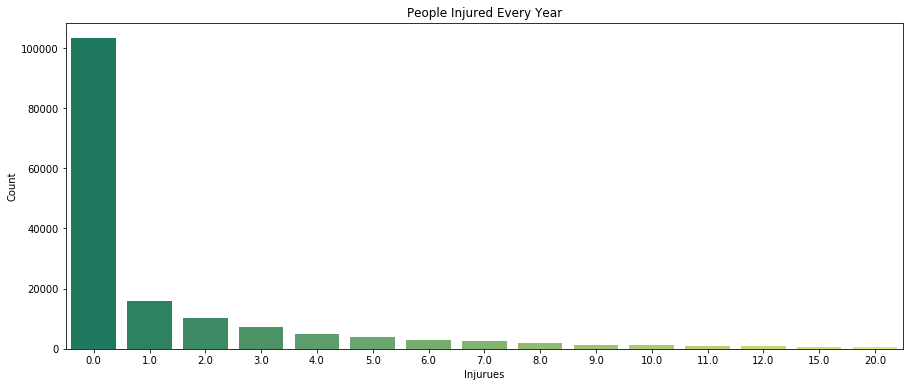

In [20]:
plt.subplots(figsize=(15,6))
sns.barplot(dataset['Wounded'].value_counts()[:20].index,dataset['Wounded'].value_counts()[:20].values,palette='summer')
plt.title("People Injured Every Year")
plt.xlabel("Injurues")
plt.ylabel("Count")
plt.show()

# Plotting the Most Active Terrorist Organizations

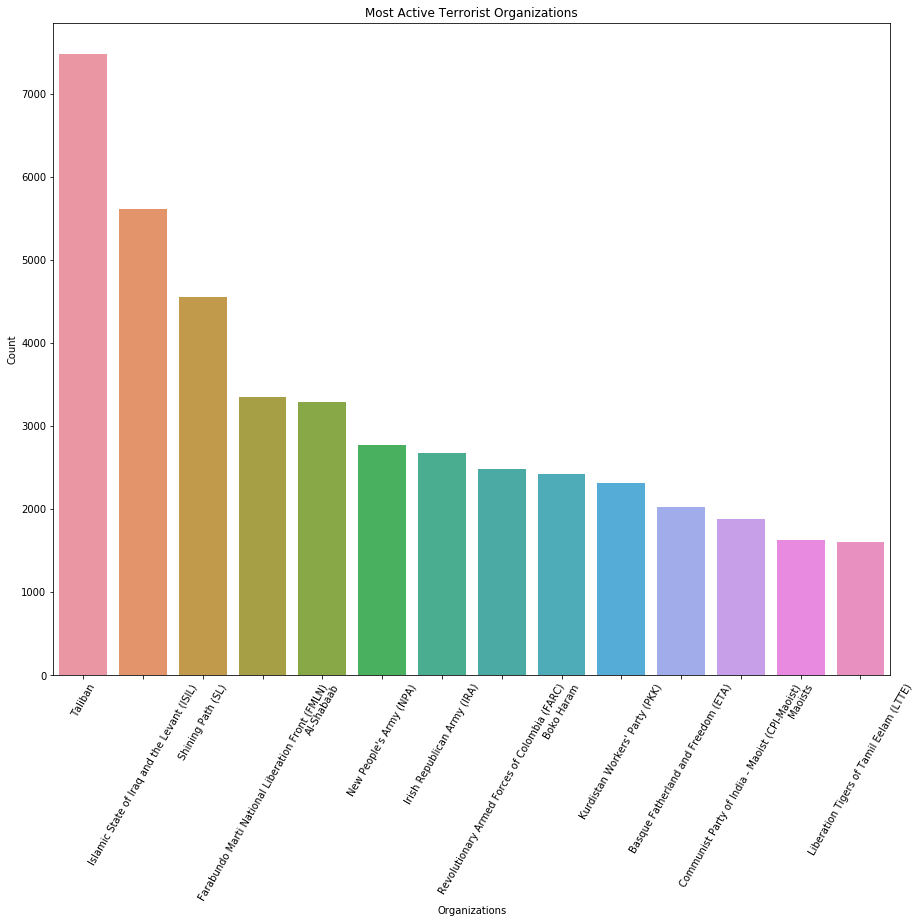

In [21]:
plt.subplots(figsize=(15,12))
sns.barplot(dataset['Group'].value_counts()[1:15].index,dataset['Group'].value_counts()[1:15].values)
plt.title("Most Active Terrorist Organizations")
plt.xticks(rotation=60)
plt.xlabel("Organizations")
plt.ylabel("Count")
plt.show()

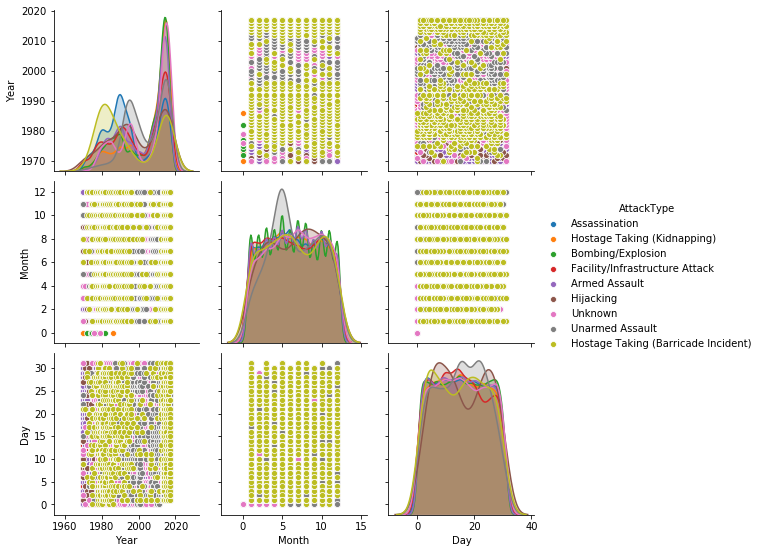

In [22]:
sns.pairplot(dataset,hue='AttackType',vars=['Year','Month','Day'])